In [5]:
import matplotlib.pyplot as plt 
import numpy as np
import os

cwd = os.getcwd()
unfreeze_e = 7+1
num_epochs = 25

# Check if the Results directory exists
results_path = os.path.join(cwd, "Trained Nets and Results")
if not os.path.isdir(results_path):
    print("'Trained Nets and Results' Directory not found.")
else:
    # Train results
    tr_acc = np.zeros((unfreeze_e+1, num_epochs))
    for fs in [0,1,2,3,7]:
        p = os.path.join(results_path, "Unfrozen_" + str(fs))
        # Check if the 'Unfrozen_X' directory exists
        if not os.path.isdir(p):
            continue

        for epoch in range(num_epochs):
            # open results files
            tar_path = os.path.join(results_path, "Unfrozen_"+str(fs), "train_output_epoch_" + str(epoch+1) + ".txt")
            out_path = os.path.join(results_path, "Unfrozen_"+str(fs), "train_target_epoch_" + str(epoch+1) + ".txt")
            
            # Check if this epoch's results exist
            if (not os.path.isfile(tar_path)) or (not os.path.isfile(out_path)):
                continue
            else:
                tar_f = open(tar_path, "r")
                out_f = open(out_path, "r")

            # read result files
            epoch_target = tar_f.readlines()
            epoch_output = out_f.readlines()

            # convert to int
            for ind in range(len(epoch_target)):
                epoch_target[ind] = epoch_target[ind][0]
                epoch_target[ind] = int(epoch_target[ind])
            for ind in range(len(epoch_output)):
                epoch_output[ind] = epoch_output[ind][0]
                epoch_output[ind] = int(epoch_output[ind])
            epoch_target = np.array(epoch_target)
            epoch_output = np.array(epoch_output)

            # calculate accuracy
            if fs < 4:
                tr_acc[fs, epoch] = sum(epoch_output==epoch_target) / float(len(epoch_target))
            else:
                tr_acc[4, epoch] = sum(epoch_output==epoch_target) / float(len(epoch_target))

            # close result files
            tar_f.close()
            out_f.close()

    # Test results
    te_acc = np.zeros((unfreeze_e+1, num_epochs))
    for fs in [0,1,2,3,7]:
        p = os.path.join(results_path, "Unfrozen_" + str(fs))
        # Check if the 'Unfrozen_X' directory exists
        if not os.path.isdir(p):
            continue

        for epoch in range(num_epochs):
            # open results files
            tar_path = os.path.join(results_path, "Unfrozen_"+str(fs), "test_output_epoch_" + str(epoch+1) + ".txt")
            out_path = os.path.join(results_path, "Unfrozen_"+str(fs), "test_target_epoch_" + str(epoch+1) + ".txt")
            
            # Check if this epoch's results exist
            if (not os.path.isfile(tar_path)) or (not os.path.isfile(out_path)):
                continue
            else:
                tar_f = open(tar_path, "r")
                out_f = open(out_path, "r")

            # read result files
            epoch_target = tar_f.readlines()
            epoch_output = out_f.readlines()

            # convert to int
            for ind in range(len(epoch_target)):
                epoch_target[ind] = epoch_target[ind][0]
                epoch_target[ind] = int(epoch_target[ind])
            for ind in range(len(epoch_output)):
                epoch_output[ind] = epoch_output[ind][0]
                epoch_output[ind] = int(epoch_output[ind])
            epoch_target = np.array(epoch_target)
            epoch_output = np.array(epoch_output)

            # calculate accuracy
            if fs < 4:
                te_acc[fs, epoch] = sum(epoch_output==epoch_target) / float(len(epoch_target))
            else:
                te_acc[4, epoch] = sum(epoch_output==epoch_target) / float(len(epoch_target))

            # close result files
            tar_f.close()
            out_f.close()

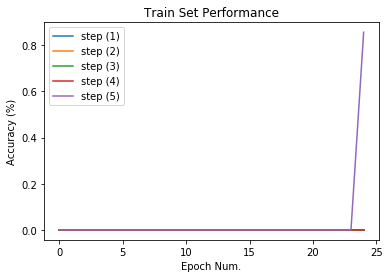

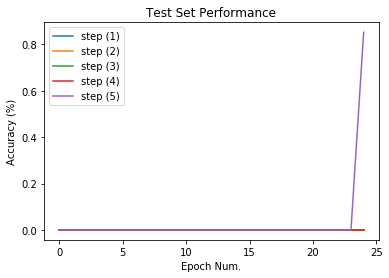

In [6]:
# plot results
plt.figure(0)
plt.plot(range(num_epochs), tr_acc[0, :], label = "step (1)")
plt.plot(range(num_epochs), tr_acc[1, :], label = "step (2)")
plt.plot(range(num_epochs), tr_acc[2, :], label = "step (3)")
plt.plot(range(num_epochs), tr_acc[3, :], label = "step (4)")
plt.plot(range(num_epochs), tr_acc[4, :], label = "step (5)")
plt.legend()
plt.title("Train Set Performance")
plt.ylabel("Accuracy (%)")
plt.xlabel("Epoch Num.")

plt.figure(1)
plt.plot(range(num_epochs), te_acc[0, :], label = "step (1)")
plt.plot(range(num_epochs), te_acc[1, :], label = "step (2)")
plt.plot(range(num_epochs), te_acc[2, :], label = "step (3)")
plt.plot(range(num_epochs), te_acc[3, :], label = "step (4)")
plt.plot(range(num_epochs), te_acc[4, :], label = "step (5)")
plt.legend()
plt.title("Test Set Performance")
plt.ylabel("Accuracy (%)")
plt.xlabel("Epoch Num.")
plt.show()
